# Supplementary plots & statistics


In [2]:
#Figure size global settings
def mm_to_inches(mm):
    return mm * 0.0393701
one_column = mm_to_inches(86)
two_column = mm_to_inches(178)
print(one_column, two_column)

3.3858286 7.007877799999999


### LECA statistics
Same as main figure 1, with different LECA definitions (2 and 4 supergroups instead of 3)

In [277]:
import pandas as pd
import numpy as np

file2 = "./Results/stats_2supergroups.csv"
file4 = "./Results/stats_4supergroups.csv"

ortho_stats2 = pd.read_csv(file2, sep = ",", index_col = 0, header = 0)
ortho_stats2.iloc[:,1:-1].astype(float)

ortho_stats4 = pd.read_csv(file4, sep = ",", index_col = 0, header = 0)
ortho_stats4.iloc[:,1:-1].astype(float)

re_names_dict = {'eggnog_diamond': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected': 'eggNOG hmm',\
'orthofinder_diamond_e-3': 'Orthofinder DIAMOND',\
'orthofinder_blast_e-3': 'Orthofinder BLAST',\
'broccoli': 'Broccoli',\
'panther_different': 'Ancestral Panther',\
'Sonicparanoid_sensitive': 'SonicParanoid',\
'Swiftortho_c50': 'SwiftOrtho'}

ortho_stats2.rename(columns=re_names_dict, inplace = True)
ortho_data2 = ortho_stats2.to_dict('index')

ortho_stats4.rename(columns=re_names_dict, inplace = True)
ortho_data4 = ortho_stats4.to_dict('index')

stats = ['Number LECA OGs', 'Median LECA OG size', 'Mean LECA OG size', \
         'stdev LECA OG size', 'Max LECA OG size', 'Independent Loss LECA OGs',\
         'Median independent loss','Mean independent loss', 'Stdev independent loss']#stats for the main figure

print(stats)

['Number LECA OGs', 'Median LECA OG size', 'Mean LECA OG size', 'stdev LECA OG size', 'Max LECA OG size', 'Independent Loss LECA OGs', 'Median independent loss', 'Mean independent loss', 'Stdev independent loss']


/Users/eva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/Users/eva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/Users/eva/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


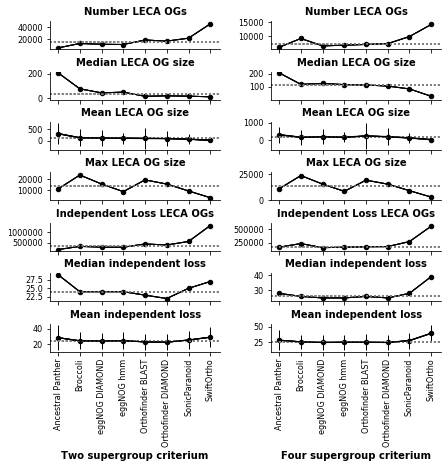

In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as s
import math as m
from matplotlib.ticker import ScalarFormatter
#sorted(ortho_data[stat].items(), key=lambda tup: tup[0].lower())
def make_plot(stat, ax, ortho_data, ticks_on = "no"):
    sorted_items = sorted(ortho_data[stat].items(), key=lambda tup: tup[0].lower())
    for ogdef, value in sorted_items:
        ogdefs = [el[0] for el in sorted_items]
        values = [el[1] for el in sorted_items]
        median = s.median(values)
        ax.scatter(ogdef, value,color = "black", s = 20) #'#7F3C8D'
        if stat not in ['Mean size OGs', 'Mean independent loss OGs']:
            ax.plot(ogdefs, values,color = "black", linewidth = 1, alpha = 0.5) #'#7F3C8D'
        ax.axhline(median, linestyle = "dotted", color = '#808080')
        ax.set_title(stat, fontweight="bold", fontsize = 10)
        if ticks_on == "no":
            ax.set_xticklabels([''])
        else:
            ax.tick_params(axis='x', rotation=90, labelsize = 8)
        ax.tick_params(axis='y', labelsize = 8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    return ogdefs, values

stat = stats

fig = plt.figure(figsize = (two_column, two_column))

gs = fig.add_gridspec(8, 2)

ax = fig.add_subplot(gs[0,0]) 
make_plot(stats[0], ax, ortho_data2)

ax1 = fig.add_subplot(gs[1,0]) 
make_plot(stats[1], ax1, ortho_data2)
    
ax2 = fig.add_subplot(gs[2,0]) 
og, val = make_plot(stats[2], ax2, ortho_data2)
stdev = []
og_i = []
for ogdef in og:
    stdev += [ortho_data2[stats[3]][ogdef]]
    og_i += [og.index(ogdef)]
ax2.errorbar(og_i, val,\
            yerr = stdev, fmt="-", color = "black", elinewidth = 1, lw = 1.5)#'#7F3C8D'

ax3 = fig.add_subplot(gs[3,0]) 
make_plot(stats[4], ax3, ortho_data2)

ax4 = fig.add_subplot(gs[4,0]) 
make_plot(stats[5], ax4, ortho_data2)

ax5 = fig.add_subplot(gs[5,0]) 
make_plot(stats[6], ax5, ortho_data2)

ax6 = fig.add_subplot(gs[6,0]) 
og2, val2 = make_plot(stats[7], ax6, ortho_data2, ticks_on = True)
stdev2 = []
og_i2 = []
for ogdef in og2:
    stdev2 += [ortho_data2[stats[8]][ogdef]]
    og_i2 += [og.index(ogdef)]
ax6.errorbar(og_i2, val2,\
            yerr = stdev2, fmt="-", color = "black", elinewidth = 1, lw =1.25)#'#7F3C8D'
plt.subplots_adjust(hspace=0.8, wspace = 0.3)
ax6.set_xlabel("Two supergroup criterium", size=10, fontweight = "bold")
########### 4 supergroups
ax = fig.add_subplot(gs[0,1]) 
make_plot(stats[0], ax, ortho_data4)

ax1 = fig.add_subplot(gs[1,1]) 
make_plot(stats[1], ax1, ortho_data4)
    
ax2 = fig.add_subplot(gs[2,1]) 
og, val = make_plot(stats[2], ax2, ortho_data4)
stdev = []
og_i = []
for ogdef in og:
    stdev += [ortho_data4[stats[3]][ogdef]]
    og_i += [og.index(ogdef)]
ax2.errorbar(og_i, val,\
            yerr = stdev, fmt="-", color = "black", elinewidth = 1, lw = 1.5)#'#7F3C8D'

ax3 = fig.add_subplot(gs[3,1]) 
make_plot(stats[4], ax3, ortho_data4)

ax4 = fig.add_subplot(gs[4,1]) 
make_plot(stats[5], ax4, ortho_data4)

ax5 = fig.add_subplot(gs[5,1]) 
make_plot(stats[6], ax5, ortho_data4)

ax6 = fig.add_subplot(gs[6,1]) 
og2, val2 = make_plot(stats[7], ax6, ortho_data4, ticks_on = True)
stdev2 = []
og_i2 = []
for ogdef in og2:
    stdev2 += [ortho_data4[stats[8]][ogdef]]
    og_i2 += [og.index(ogdef)]
ax6.errorbar(og_i2, val2,\
            yerr = stdev2, fmt="-", color = "black", elinewidth = 1, lw =1.25)#'#7F3C8D'
plt.subplots_adjust(hspace=0.8, wspace = 0.3)
ax6.set_xlabel("Four supergroup criterium", size=10, fontweight = "bold")

file_name='./Figures/Supplementary/stats_LECA_2_4supgr.pdf'
plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.05, format = 'pdf',transparent = True)

### LECA OGs and OGs counts per proteome

In [3]:
import pandas as pd

proteomes = pd.read_csv("./Results/Tables_out/counts_leca_proteomes.csv", sep = ",", index_col = 0)

list_col = list(proteomes.columns)
list_col_leca = [el for el in list_col if "leca" in el]
list_col_nonleca = [el for el in list_col if "leca" not in el and "protein_counts" not in el]
print(list_col_nonleca)

leca_df = proteomes[list_col_leca].astype(float) # containing leca protein counts
nonleca_df = proteomes[list_col_nonleca].astype(float) # containing non leca protein counts


new_names = ['Broccoli', 'eggNOG DIAMOND', 'eggNOG hmm',\
       'Orthofinder BLAST', 'Orthofinder DIAMOND', 'Ancestral Panther',\
       'SonicParanoid', 'SwiftOrtho']

re_name_leca = {k:v for (k,v) in zip(list_col_leca, new_names)}
re_name_nonleca = {k:v for (k,v) in zip(list_col_nonleca, new_names)}

leca_df = leca_df.rename(columns = re_name_leca)
nonleca_df = nonleca_df.rename(columns = re_name_nonleca)
#nonleca_df = nonleca_df.join(proteomes["protein_counts"]).rename(columns = {"protein_counts":"Proteome size"})


['broccoli_ogs_of_57696', 'eggnog_diamond_ogs_of_204458', 'eggnog_hmmer_corrected_ogs_of_71918', 'orthofinder_blast_e-3_ogs_of_558290', 'orthofinder_diamond_e-3_ogs_of_779004', 'panther_different_ogs_of_6068', 'Sonicparanoid_sensitive_ogs_of_91266', 'Swiftortho_c50_ogs_of_351449']


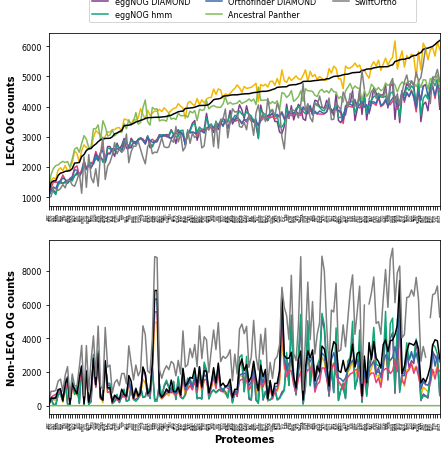

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

colors2 = ['#7F3C8D', '#11A579','#3969AC','#F2B701','#E73F74','#80BA5A', '#000000', '#808080','#c0ff33','#ff9033']

colors = {'eggNOG DIAMOND': colors2[0],\
          'eggNOG hmm':colors2[1],\
          'Orthofinder DIAMOND':colors2[2],\
          'Orthofinder BLAST':colors2[4],\
          'Ancestral Panther':colors2[5],\
          'Broccoli': colors2[3],
          'SonicParanoid': colors2[6],\
          'SwiftOrtho': colors2[7],\
         'Proteome size': colors2[9]}

fig = plt.figure(figsize = (two_column, two_column))

#### leca ogs
dfs = leca_df.sort_values('SonicParanoid')


ax1 = fig.add_subplot(2, 1, 1)
dfs.plot(color = [colors[x] for x in dfs], ax = ax1)

plt.ylabel("LECA OG counts", size=10, fontweight = "bold")
#plt.xlabel("Proteomes", size=10, fontweight = "bold") 
plt.yticks(size = 8)
plt.xticks(range(0, len(dfs)), list(dfs.index), size = 3, rotation='vertical')



#### non leca OGs and proteome size
dfs2 = nonleca_df.loc[leca_df.sort_values('SonicParanoid').index]

ax2 = fig.add_subplot(2, 1, 2)
dfs2.plot(color = [colors[x] for x in dfs2], ax = ax2)

plt.ylabel("Non-LECA OG counts", size=10, fontweight = "bold")
plt.xlabel("Proteomes", size=10, fontweight = "bold") 
plt.yticks(size = 8)
plt.xticks(range(0, len(dfs)), list(dfs.index), size = 3, rotation='vertical')

ax1.get_legend().remove()
ax2.get_legend().remove()
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', ncol = 3, bbox_to_anchor=(0.5, 0.94), prop={'size': 8}) #bbox_to_anchor=(1.22, 0.5),
#plt.tight_layout()


file_name = "./Figures/Supplementary/leca_og_per_proteomes.pdf"
plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.25, format='pdf',\
                transparent = True)

### Distance distributions
Negative, positive and random interaction set distance distributions for all orthologies

In [326]:
import pandas as pd
file_dir = "./Results/Distances/"

sets = ["eggnog_diamond_distances",\
        "eggnog_hmmer_corrected_distances",\
        "orthofinder_diamond_e-3_distances",\
        "orthofinder_blast_e-3_distances",\
        "broccoli_distances",\
        "panther_different_distances",\
        "Sonicparanoid_sensitive_distances",\
        "Swiftortho_c50_distances"]

random_set = ["eggnog_diamond_distances_random",\
        "eggnog_hmmer_corrected_distances_random",\
        "orthofinder_diamond_e-3_distances_random",\
        "orthofinder_blast_e-3_distances_random",\
        "broccoli_distances_random",\
        "panther_different_distances_random",\
        "Sonicparanoid_sensitive_distances_random",\
        "Swiftortho_c50_distances_random"]
              
data_dict1 = {}
for i in range(len(sets)):
    name = sets[i]
    name_rand = random_set[i]
    
    print(name, name_rand)
    #dataframes need to be concatenated (neg+pos and random)
    data_dict1[name] = pd.concat([pd.read_csv(file_dir+name, sep = "\t", index_col = False,\
                                               usecols=['pair', 'cosine', 'Interaction']).query('Interaction != "RusselNeg"'),\
                                   pd.read_csv(file_dir+name_rand, sep = "\t", index_col = False,\
                                               usecols=['pair', 'cosine', 'Interaction'])])

eggnog_diamond_distances eggnog_diamond_distances_random
eggnog_hmmer_corrected_distances eggnog_hmmer_corrected_distances_random
orthofinder_diamond_e-3_distances orthofinder_diamond_e-3_distances_random
orthofinder_blast_e-3_distances orthofinder_blast_e-3_distances_random
broccoli_distances broccoli_distances_random
panther_different_distances panther_different_distances_random
Sonicparanoid_sensitive_distances Sonicparanoid_sensitive_distances_random
Swiftortho_c50_distances Swiftortho_c50_distances_random


In [327]:
#names to rename later when plotting
re_names_dist = {'eggnog_diamond_distances': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected_distances': 'eggNOG hmm',\
'orthofinder_diamond_e-3_distances': 'Orthofinder DIAMOND',\
'orthofinder_blast_e-3_distances': 'Orthofinder BLAST',\
'broccoli_distances': 'Broccoli',\
'panther_different_distances': 'Ancestral Panther',\
'Sonicparanoid_sensitive_distances': 'SonicParanoid',\
'Swiftortho_c50_distances': 'SwiftOrtho'}
data_dict = {re_names_dist[k]: v for k, v in data_dict1.items()}

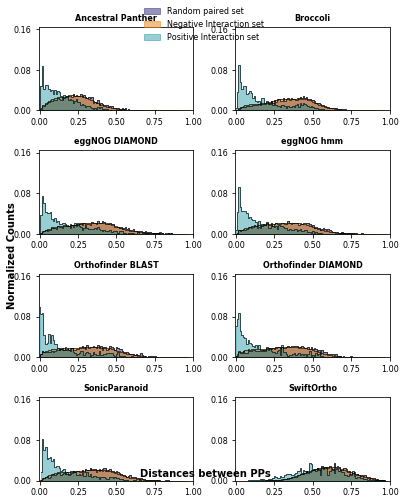

In [20]:
%matplotlib inline
import statistics as s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


labels = ['']

i = 0
fig = plt.figure(figsize = (0.8*two_column, two_column))

nrows = 4
ncols = 2

for ortho in sorted(data_dict.keys(), key=str.lower):
    i += 1 
    ax = fig.add_subplot(nrows,ncols,i)
    df = data_dict[ortho]
    dists_C = round(df[df.Interaction == 'RandomSet'].loc[:,'cosine'],2)
    dcr = dists_C.value_counts().sort_index() #count per distance and sort on distance (index)
    dcrd = pd.DataFrame({'Distance': dcr.index, 'Counts': dcr.values}) #make df to work with
    ax.step(dcrd.loc[:,'Distance'], dcrd.loc[:,'Counts']/sum(dcrd.loc[:,'Counts']), where = 'mid',\
            color = "black", alpha = 0.6, linewidth = 1)#, alpha = 0.4, edgecolor = "black")
    ax.fill_between(dcrd.loc[:,'Distance'], dcrd.loc[:,'Counts']/sum(dcrd.loc[:,'Counts']),\
                    step = 'mid', color = '#4b4b8f', alpha = 0.6, label = "Random paired set")

    dists_P = round(df[df.Interaction == 'PseudoNeg'].loc[:,'cosine'], 2)
    dcp = dists_P.value_counts().sort_index() #count per distance and sort on distance (index)
    dcpd = pd.DataFrame({'Distance': dcp.index, 'Counts': dcp.values}) #make df to work with

    ax.step(dcpd.loc[:,'Distance'], dcpd.loc[:,'Counts']/sum(dcpd.loc[:,'Counts']), where = 'mid',\
            color = "black", alpha = 0.6, linewidth = 1)#, alpha = 0.4, edgecolor = "black")
    ax.fill_between(dcpd.loc[:,'Distance'], dcpd.loc[:,'Counts']/sum(dcpd.loc[:,'Counts']),\
                    step = 'mid', color = '#E68310', alpha = 0.5, label = "Negative Interaction set")

    dists_B = round(df[df.Interaction == 'BioGrid'].loc[:,'cosine'],2)
    dc = dists_B.value_counts().sort_index() #count per distance and sort on distance (index)
    dcd = pd.DataFrame({'Distance': dc.index, 'Counts': dc.values}) #make df to work with
    ax.step(dcd.loc[:,'Distance'], dcd.loc[:,'Counts']/sum(dcd.loc[:,'Counts']), where = 'mid',\
            color = "black", alpha = 0.6, linewidth = 1)#, alpha = 0.4, edgecolor = "black")
    ax.fill_between(dcd.loc[:,'Distance'], dcd.loc[:,'Counts']/sum(dcd.loc[:,'Counts']),\
                    step = 'mid', color = '#008695', alpha = 0.4, label = "Positive Interaction set")

    plt.yticks(np.arange(0, 0.21, step=0.08), size = 8)
    plt.xticks(size = 8)

 
    plt.title(ortho, fontsize = 8, fontweight = "bold")
    
    plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    
    plt.xlim(-0.005,1)
    plt.ylim(0,0.165)

#One legend for all
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc = 3, ncol = 1, prop={'size': 8}, mode = 'expand',\
           bbox_to_anchor = (0.35, .91, .1, .102),borderaxespad=0., frameon = False)

text = fig.text(0.5, 0.06, 'Distances between PPs', ha='center', fontsize = 10, fontweight = 'bold')
text2 = fig.text(0.01, 0.5, 'Normalized Counts', va='center', rotation='vertical', fontsize = 10, fontweight = 'bold')

file_name = "".join(["./Figures/Supplementary/Distance_Distributions_Cosine.pdf"])
plt.savefig(file_name, format='pdf',\
                transparent = True, bbox_extra_artists=(lgd,text, text2))

plt.subplots_adjust(hspace=0.8, wspace = 0.3)
plt.tight_layout()

In [340]:
from scipy.stats import mannwhitneyu, kruskal, wilcoxon
from itertools import combinations
#Mann-Whitney U Test to test if distributions are equal or not
#Assumptions
#
#    Observations in each sample are independent and identically distributed (iid).
#    Observations in each sample can be ranked.

#Interpretation

#    H0: the distributions of both samples are equal o that there is a 50% 
#probability that an observation from a value randomly selected from one population 
#exceeds an observation randomly selected from the other population.
#    H1: the distributions of both samples are not equal.
#If the P value is small, you can reject the null hypothesis that the difference 
#is due to random sampling, and conclude instead that the populations are distinct.

#test if random and pseudonegative set are significantly different
for orthology in data_dict:
    df = data_dict[orthology]
    data1 = df[df.Interaction == 'RandomSet'].loc[:,'cosine']
    data2 = df[df.Interaction == 'PseudoNeg'].loc[:,'cosine']
    data3 = df[df.Interaction == 'BioGrid'].loc[:,'cosine']
    
    stat12, p12 = mannwhitneyu(data1, data2)
    stat23, p23 = mannwhitneyu(data2, data3)

    if p12 < 0.001:
        print("mannwhitney RANDOM VS. PSEUDO: ", orthology,'\t', '\t', p12)
    if p23 < 0.001:
        print("mannwhitney PSEUDO VS. BIOGRID: ", orthology,'\t', '\t', p23)
    

mannwhitney RANDOM VS. PSEUDO:  eggNOG DIAMOND 	 	 4.922667747844073e-16
mannwhitney PSEUDO VS. BIOGRID:  eggNOG DIAMOND 	 	 1.07768974095305e-310
mannwhitney RANDOM VS. PSEUDO:  eggNOG hmm 	 	 8.312878201506958e-17
mannwhitney PSEUDO VS. BIOGRID:  eggNOG hmm 	 	 1.0632379074442548e-291
mannwhitney RANDOM VS. PSEUDO:  Orthofinder DIAMOND 	 	 2.3792257925596117e-30
mannwhitney PSEUDO VS. BIOGRID:  Orthofinder DIAMOND 	 	 0.0
mannwhitney RANDOM VS. PSEUDO:  Orthofinder BLAST 	 	 4.975830875601184e-33
mannwhitney PSEUDO VS. BIOGRID:  Orthofinder BLAST 	 	 0.0
mannwhitney RANDOM VS. PSEUDO:  Broccoli 	 	 1.2698529933736823e-26
mannwhitney PSEUDO VS. BIOGRID:  Broccoli 	 	 0.0
mannwhitney RANDOM VS. PSEUDO:  Ancestral Panther 	 	 5.1091665847216905e-22
mannwhitney PSEUDO VS. BIOGRID:  Ancestral Panther 	 	 0.0
mannwhitney RANDOM VS. PSEUDO:  SonicParanoid 	 	 3.0377541301557194e-28
mannwhitney PSEUDO VS. BIOGRID:  SonicParanoid 	 	 0.0
mannwhitney RANDOM VS. PSEUDO:  SwiftOrtho 	 	 1.550850

### Distances between PPs of different methods

In [47]:
import pandas as pd
import os
from os import listdir

file_dir = "./Results/All-vs-all-profiles/"
#Need the order of the files, so have to make list by hand
file_list = listdir(file_dir)
fileL = ["".join([file_dir, el]) for el in file_list]

['broccoli_vs_eggnog_diamond', 'broccoli_vs_eggnog_hmmer_corrected', 'broccoli_vs_orthofinder_blast_e-3', 'broccoli_vs_orthofinder_diamond_e-3', 'broccoli_vs_panther_different', 'broccoli_vs_Sonicparanoid_sensitive', 'broccoli_vs_Swiftortho_c50', 'eggnog_diamond_vs_eggnog_hmmer_corrected', 'eggnog_diamond_vs_orthofinder_blast_e-3', 'eggnog_diamond_vs_orthofinder_diamond_e-3', 'eggnog_diamond_vs_panther_different', 'eggnog_diamond_vs_Sonicparanoid_sensitive', 'eggnog_diamond_vs_Swiftortho_c50', 'eggnog_hmmer_corrected_vs_orthofinder_blast_e-3', 'eggnog_hmmer_corrected_vs_orthofinder_diamond_e-3', 'eggnog_hmmer_corrected_vs_panther_different', 'eggnog_hmmer_corrected_vs_Sonicparanoid_sensitive', 'eggnog_hmmer_corrected_vs_Swiftortho_c50', 'orthofinder_blast_e-3_vs_orthofinder_diamond_e-3', 'orthofinder_blast_e-3_vs_panther_different', 'orthofinder_blast_e-3_vs_Sonicparanoid_sensitive', 'orthofinder_blast_e-3_vs_Swiftortho_c50', 'orthofinder_diamond_e-3_vs_panther_different', 'orthofinder

In [16]:
#make dictionary with all the dataframes with distances between orthologies
data_dict = {}
for i in range(len(fileL)):
    file = fileL[i]
    name = file.split("/")[-1]
    data_dict[name] = pd.read_csv(file, sep = "\t", index_col = 0, header = None, usecols=range(0,2))
    data_dict[name].loc[:,1].astype(float)


In [17]:
re_names = {'eggnog_diamond': 'eggNOG D.',\
'eggnog_hmmer_corrected': 'eggNOG h.',\
'orthofinder_diamond_e-3': 'Orthof. D.',\
'orthofinder_blast_e-3': 'Orthof. B.',\
'panther_different': 'Ancest. Panth.',\
'Sonicparanoid_sensitive': 'SonicParanoid',\
'Swiftortho_c50': 'SwiftOrtho',\
'broccoli': 'Broccoli'}
sorted_file_list = sorted(file_list, key = lambda x: x.lower())
print(sorted_file_list)

1 broccoli_vs_eggnog_diamond
8 broccoli_vs_eggnog_hmmer_corrected
15 broccoli_vs_orthofinder_blast_e-3
22 broccoli_vs_orthofinder_diamond_e-3
29 broccoli_vs_panther_different
36 broccoli_vs_Sonicparanoid_sensitive
43 broccoli_vs_Swiftortho_c50
9 eggnog_diamond_vs_eggnog_hmmer_corrected
16 eggnog_diamond_vs_orthofinder_blast_e-3
23 eggnog_diamond_vs_orthofinder_diamond_e-3
30 eggnog_diamond_vs_panther_different
37 eggnog_diamond_vs_Sonicparanoid_sensitive
44 eggnog_diamond_vs_Swiftortho_c50
17 eggnog_hmmer_corrected_vs_orthofinder_blast_e-3
24 eggnog_hmmer_corrected_vs_orthofinder_diamond_e-3
31 eggnog_hmmer_corrected_vs_panther_different
38 eggnog_hmmer_corrected_vs_Sonicparanoid_sensitive
45 eggnog_hmmer_corrected_vs_Swiftortho_c50
25 orthofinder_blast_e-3_vs_orthofinder_diamond_e-3
32 orthofinder_blast_e-3_vs_panther_different
39 orthofinder_blast_e-3_vs_Sonicparanoid_sensitive
46 orthofinder_blast_e-3_vs_Swiftortho_c50
33 orthofinder_diamond_e-3_vs_panther_different
40 orthofinder_d

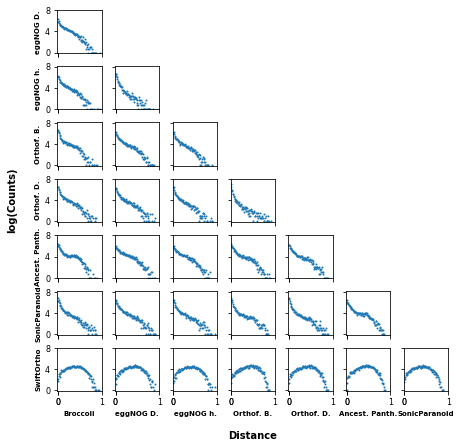

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as s
import numpy as np
import seaborn as sns
from sklearn.utils.extmath import stable_cumsum

fig = plt.figure(figsize = (two_column, two_column))
ax0 = fig.add_subplot(111, frameon=False)
ax0.set_ylabel("log(Counts)", size=10, fontweight = "bold", labelpad = 40)
ax0.set_xlabel("Distance", size = 10, fontweight = "bold", labelpad = 40)
ax0.set_xticks([])
ax0.set_yticks([])
#Rutger: if the log of the counts is a straight line, the distribution is "really" exponential

size = 7 #matrix size

#iterator for the subplots
matrix = np.arange(size**2).reshape(size, size)
matrix = matrix+1
i = []
for n in range(0, size):
    i += list(matrix[n:,n]) #fill per column
    
#rows and columns for the labels
rows = matrix[0:,0]
cols = matrix[size-1:,][0]

j = 0
for name in sorted(file_list, key = lambda x: x.lower()):
    df = data_dict[name]
    dists = df.loc[:,1]
    dc = dists.value_counts().sort_index()
    dcd = pd.DataFrame({'distance': dc.index, 'counts': np.log(dc.values)})
    a = range(0,len(dc),3)
    ax = fig.add_subplot(size,size,i[j])
    ax.scatter(dcd.loc[:,'distance'], dcd.loc[:,'counts'],linestyle = 'None', marker = 'o', s = 1)
    print(i[j], name)
    plt.ylim(-0.1,8.1)
    plt.xlim(-0.0125,1)
    ax.set_xticks([int(0),int(0.5),int(1)])
    ax.xaxis.set_tick_params(labelsize=8)
    ax.set_yticks([0,4,8])
    ax.yaxis.set_tick_params(labelsize=8)

    if i[j] not in rows:
        labels = [item.get_text() for item in ax.get_yticklabels()]
        empty_string_labels = ['']*len(labels)
        ax.set_yticklabels(empty_string_labels)
    if i[j] in rows:
        ax.set_ylabel(re_names[name.split("_vs_")[-1]], size=7, fontweight = "bold")
    if i[j] not in  cols:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        empty_string_labels = ['']*len(labels)
        ax.set_xticklabels(empty_string_labels)
    if i[j] in cols:
        ax.set_xlabel(re_names[name.split("_vs_")[0]], size=7, fontweight = "bold")
    j+=1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

import os.path
from os import path

file_name = "".join(['./Figures/Supplementary/Distances_between_PPs.pdf'])

plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.05, format = 'pdf')

#### Perfect overlapping OGs

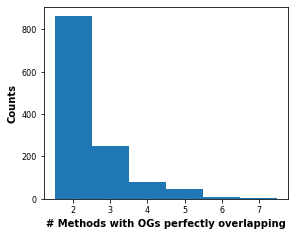

In [269]:
import pandas
import matplotlib

ogs_top = pd.read_csv("./Results/Tables_out/OG_groups_top.csv", sep = "\t", header = None)

fig = plt.figure(figsize = (0.60*two_column, one_column))

plt.hist(ogs_top[0], bins = np.arange(2,9)-0.5)
plt.ylabel("Counts", size=10, fontweight = "bold")
plt.xlabel("# Methods with OGs perfectly overlapping", size=10, fontweight = "bold")
plt.xticks(size = 8)
plt.yticks(size = 8)

file_name = "".join(['./Figures/Supplementary/Perfectly overlapping OGs.pdf'])
plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.05, format = 'pdf')

### Load data from sql database

In [49]:
import re
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import sys

import eukarya
# Load the specific table objects
from eukarya.database import Species, Proteins, Genes, engine, Session, get_orthology_leca_tables

# Setting up the logger
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)-8s %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

session = Session()  # Start DB session

/Users/eva/Documents/UU/ComparingOrthologies/eukarya/


In [50]:
def loadOrthologies(table):
    ''' Loads the orthology table into a dictionary. '''
    og_dict = dict()
    query = session.query(table.gene_id,table.og_id).distinct()
    logger.info(query.statement)
    for gene_id,og_id in query.all():
        og_dict[gene_id] = og_id
    return og_dict

def loadLECAOrthologies(table,leca_table):
    ''' Loads the leca filtered orthology table into a dictionary. '''
    og_dict = dict()
    query = session.query(table.gene_id,table.og_id).join(leca_table).distinct()
    logger.info(query.statement)
    for gene_id,og_id in query.all():
        og_dict[gene_id] = og_id
        if gene_id == '1421252':
            print(og_id)
    return og_dict

In [51]:
# Load the orthologies unfiltered for LECA OGs

Orthologies = dict()
for orthodef,tables in get_orthology_leca_tables().items():
    Orthologies[orthodef] = loadOrthologies(tables[0])
# Load the orthologies filtered for leca OGs
Orthologies_leca_ogs = dict()
for orthodef,tables in get_orthology_leca_tables().items():
    Orthologies_leca_ogs[orthodef] = loadLECAOrthologies(tables[0],tables[1])

2020-07-03 16:34:40 INFO     SELECT DISTINCT annotations.orthofinder_diamond.gene_id, annotations.orthofinder_diamond.og_id 
FROM annotations.orthofinder_diamond
2020-07-03 16:34:55 INFO     SELECT DISTINCT annotations.eggnog_diamond.gene_id, annotations.eggnog_diamond.og_id 
FROM annotations.eggnog_diamond
2020-07-03 16:35:05 INFO     SELECT DISTINCT annotations.eggnog_hmmer_corrected.gene_id, annotations.eggnog_hmmer_corrected.og_id 
FROM annotations.eggnog_hmmer_corrected
2020-07-03 16:35:14 INFO     SELECT DISTINCT annotations.orthofinder_blast_3.gene_id, annotations.orthofinder_blast_3.og_id 
FROM annotations.orthofinder_blast_3
2020-07-03 16:35:29 INFO     SELECT DISTINCT annotations.panther_corrected.gene_id, annotations.panther_corrected.og_id 
FROM annotations.panther_corrected
2020-07-03 16:35:39 INFO     SELECT DISTINCT annotations.manual.gene_id, annotations.manual.og_id 
FROM annotations.manual
2020-07-03 16:35:39 INFO     SELECT DISTINCT annotations.broccoli.gene_id, anno

In [52]:
# Some lists of Orthologies keys for ease of use

# All the orthology definitions, including the Manual set
Orthologies_all = list(Orthologies.keys())

# All the to be tested orthology definitions
Orthologies_cropped = Orthologies_all.copy()
Orthologies_cropped.remove('manual')

In [53]:
# Create a pandas table to store the results in for nice tabular representation.
ars_df = pd.DataFrame({"Orthology": Orthologies_all})
ars_df = ars_df.set_index("Orthology")

In [54]:
# Pre-make the set of gene ids for manual so that we don't have to do it each itteration
manual_gene_ids = set(Orthologies['manual'].keys())

# Lists to store results in
ars = list()
intersect_size = list()

for ogdef in Orthologies_all:
    # First get the intersect of gene ids
    ogdef_gene_ids = set(Orthologies[ogdef].keys())
    intersect = manual_gene_ids.intersection(ogdef_gene_ids)
    intersect_size.append(len(intersect))  # Store the size of the set to be compared
    
    # Convert the gene ids into the Ortho group names (labels)
    manual_ogid_labels = [Orthologies['manual'][id] for id in sorted(intersect)]
    ogdef_ogid_labels = [Orthologies[ogdef][id] for id in sorted(intersect)]
    
    # Calculate the ARS score
    ars.append(adjusted_rand_score(manual_ogid_labels,ogdef_ogid_labels))
    
# Add results to table and show
ars_df["pairwise ARS"] = ars
ars_df["pairwise set size"] = intersect_size
ars_df

,pairwise ARS,pairwise set size
Orthology,,
orthofinder_diamond_e-3,0.845478,5993
eggnog_diamond,0.890591,5213
eggnog_hmmer_corrected,0.897013,5046
orthofinder_blast_e-3,0.785134,5993
panther_corrected,0.921149,5361
manual,1.000000,5993
broccoli,0.825947,5671
swiftortho,0.311187,5406
sonicparanoid_sensitive,0.813915,5414


In [55]:
# Note that the difference in the code here is the use of the Orthologies_leca_ogs dict instead of the Orthologies dict.
import numpy as np
# Lists to store results in
ars = list()
intersect_size = list()

for ogdef in Orthologies_all:
    # First get the intersect of gene ids
    print(ogdef)
    ogdef_gene_ids = set(Orthologies_leca_ogs[ogdef].keys())
    intersect = manual_gene_ids.intersection(ogdef_gene_ids)
    # Convert the gene ids into the Ortho group names (labels)
    laura_id = []
    for id in sorted(intersect):
        if id not in Orthologies_leca_ogs['manual']:
            laura_id += [id]
    #print(sorted(laura_id))
    main_list = list(np.setdiff1d(list(intersect),laura_id, assume_unique=True))
    manual_ogid_labels = [Orthologies_leca_ogs['manual'][id] for id in sorted(main_list)]
    ogdef_ogid_labels = [Orthologies_leca_ogs[ogdef][id] for id in sorted(main_list)]
    
    # Calculate the ARS score
    ars.append(adjusted_rand_score(manual_ogid_labels,ogdef_ogid_labels))
    intersect_size.append(len(main_list))  # Store the size of the set to be compared

# Add results to table and show
ars_df["Pairwise ARS LECA"] = ars
ars_df["Pairwise LECA set size"] = intersect_size
ars_df

orthofinder_diamond_e-3
eggnog_diamond
eggnog_hmmer_corrected
orthofinder_blast_e-3
panther_corrected
manual
broccoli
swiftortho
sonicparanoid_sensitive


,pairwise ARS,pairwise set size,Pairwise ARS LECA,Pairwise LECA set size
Orthology,,,,
orthofinder_diamond_e-3,0.845478,5993,0.913632,4921
eggnog_diamond,0.890591,5213,0.935964,4308
eggnog_hmmer_corrected,0.897013,5046,0.939985,4178
orthofinder_blast_e-3,0.785134,5993,0.820311,5278
panther_corrected,0.921149,5361,0.921149,5361
manual,1.000000,5993,1.000000,5993
broccoli,0.825947,5671,0.891523,5052
swiftortho,0.311187,5406,0.520663,3295
sonicparanoid_sensitive,0.813915,5414,0.878832,4596


### Grid plots

In [56]:
from seaborn import cm
#from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
autumn = cm.rocket_r
newcolors = autumn(np.linspace(0.15, 0.8, 256))#[::-1]
print(newcolors)
white = np.array([1, 1, 1, 1])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)

[[0.96492035 0.69534192 0.5451917  1.        ]
 [0.96479861 0.68910113 0.53756026 1.        ]
 [0.96479861 0.68910113 0.53756026 1.        ]
 ...
 [0.30592213 0.11432553 0.29542718 1.        ]
 [0.29977678 0.11356089 0.29254823 1.        ]
 [0.29977678 0.11356089 0.29254823 1.        ]]


In [57]:
re_names = {'eggnog_diamond': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected': 'eggNOG hmm',\
'orthofinder_diamond_e-3': 'Orthof. DIAMOND',\
'orthofinder_blast_e-3': 'Orthof. BLAST',\
'panther_corrected': 'Ancest. Panther',\
'sonicparanoid_sensitive': 'SonicParanoid',\
'swiftortho': 'SwiftOrtho',\
'broccoli': 'Broccoli'}

['orthofinder_diamond_e-3', 'eggnog_diamond', 'eggnog_hmmer_corrected', 'orthofinder_blast_e-3', 'panther_corrected', 'broccoli', 'swiftortho', 'sonicparanoid_sensitive']
orthofinder_diamond_e-3
eggnog_diamond
eggnog_hmmer_corrected
orthofinder_blast_e-3
panther_corrected
broccoli
swiftortho
sonicparanoid_sensitive


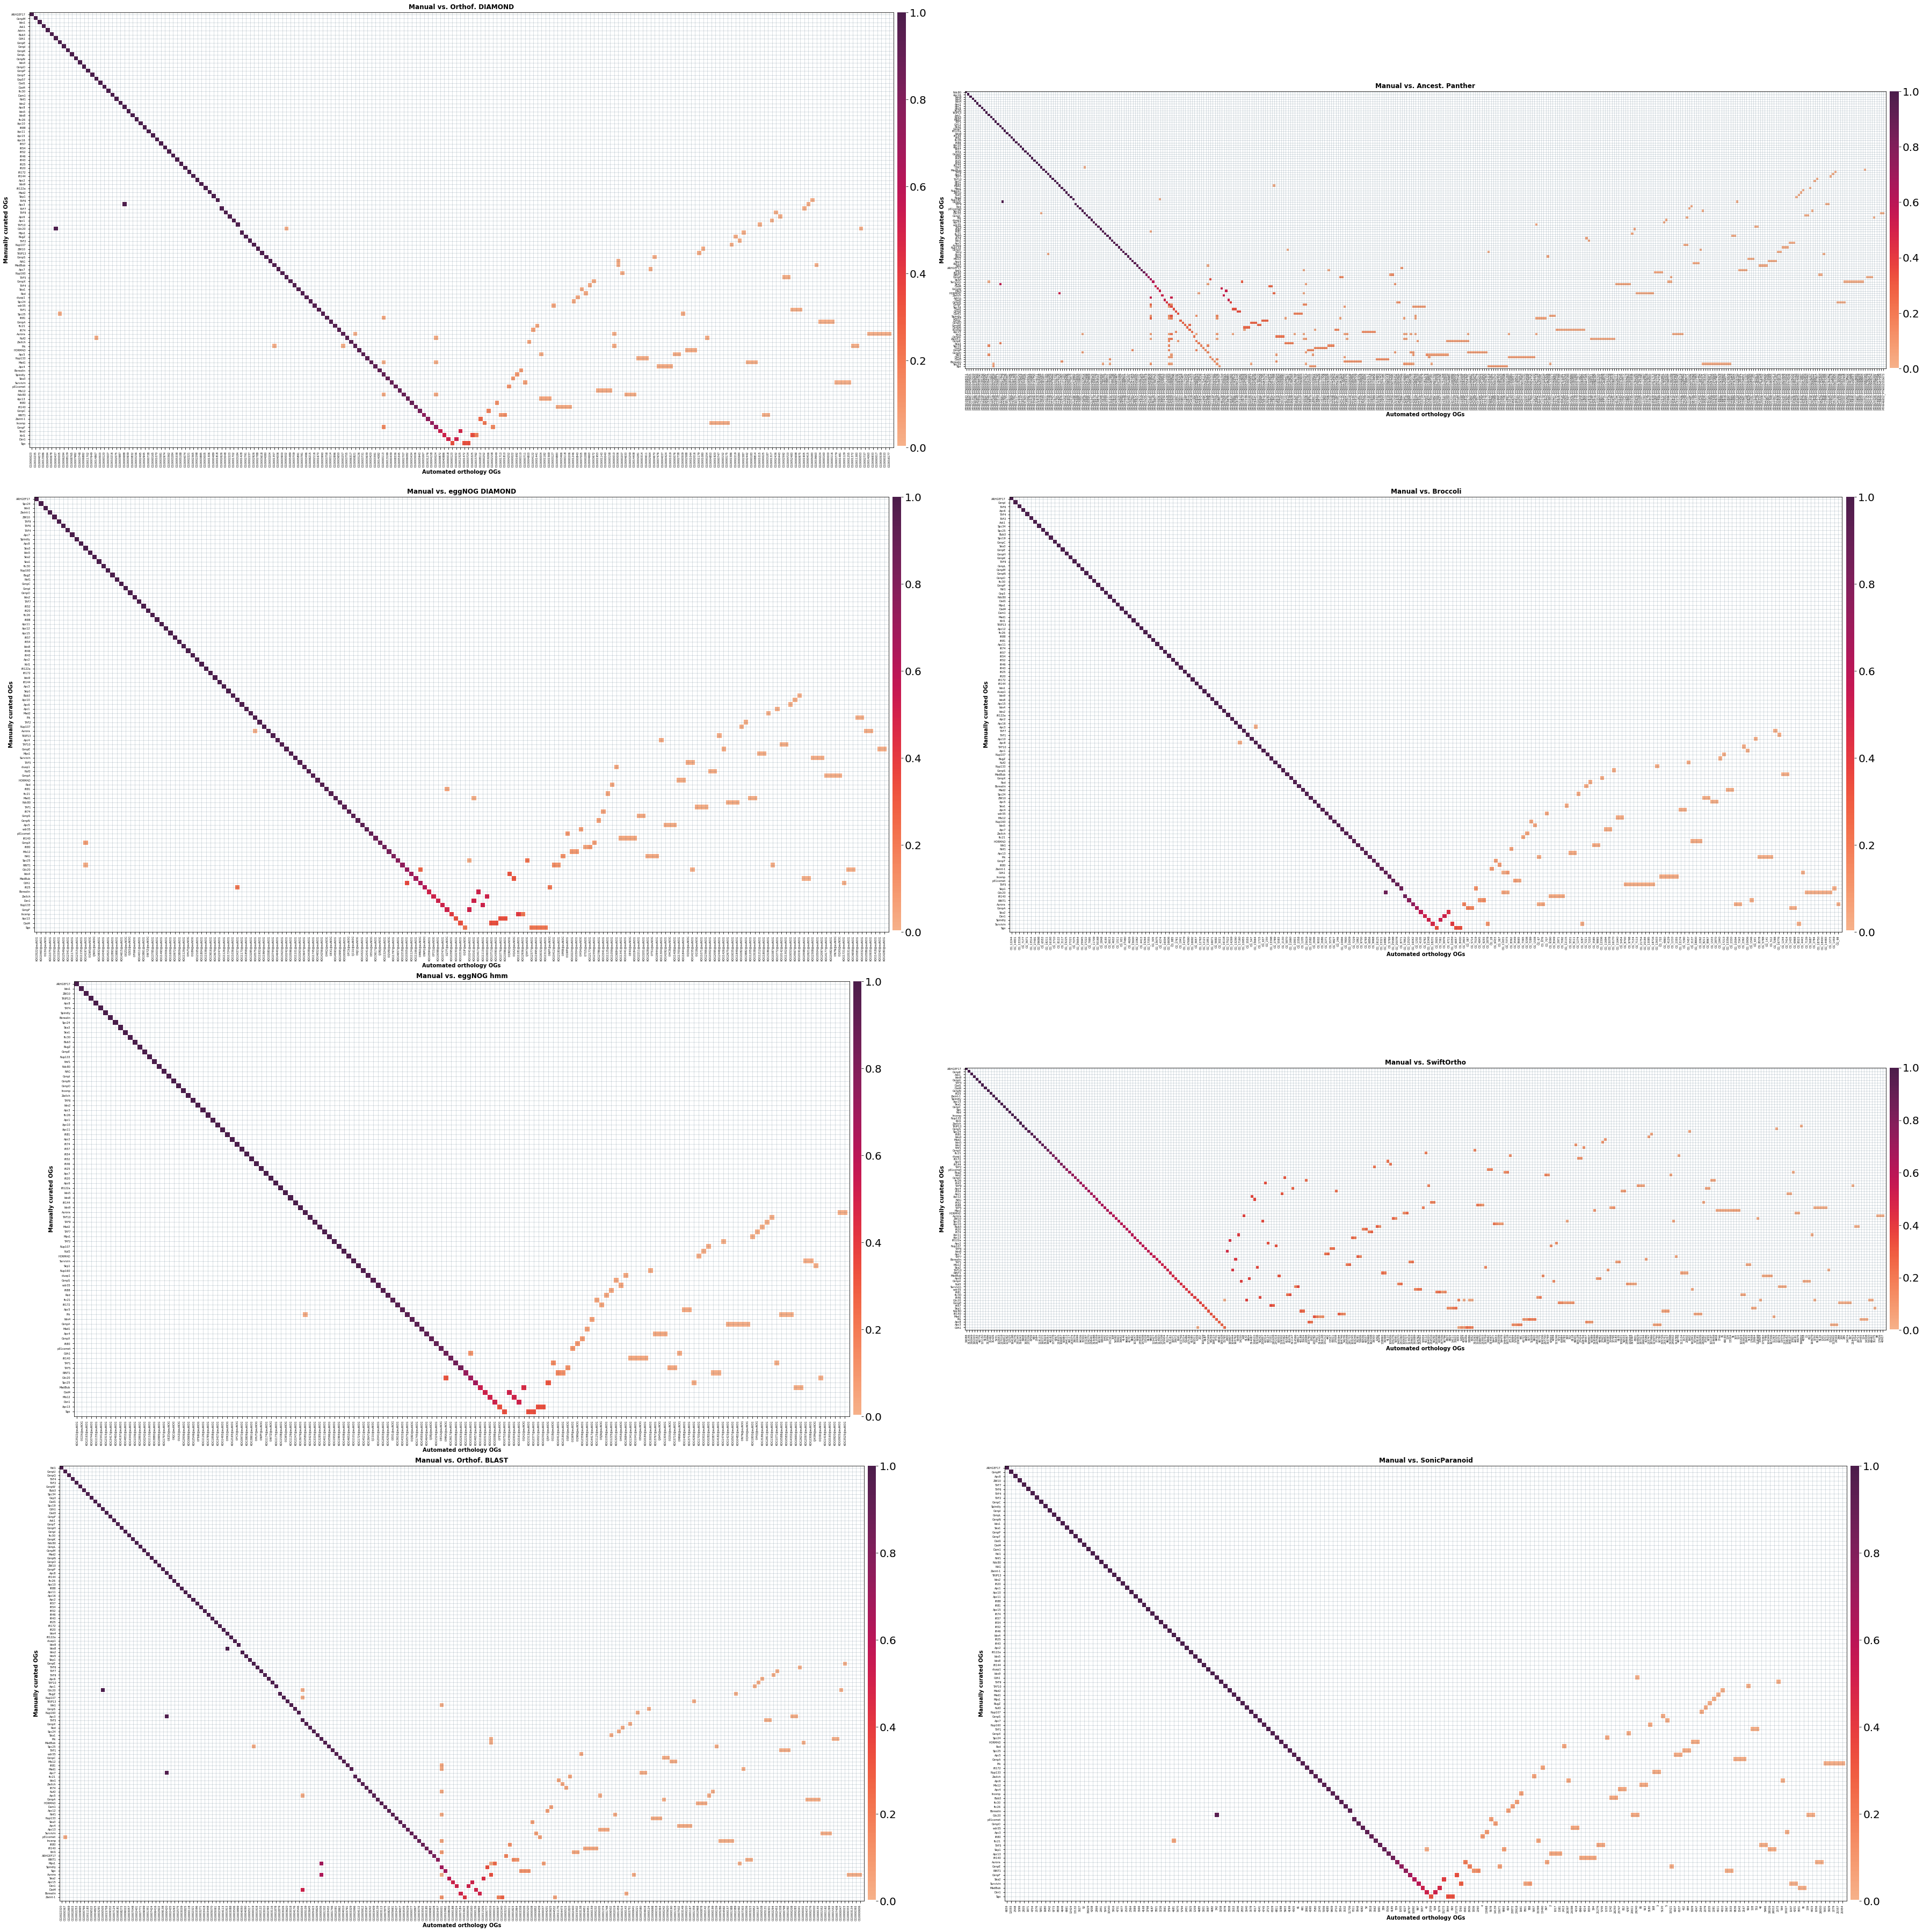

In [58]:
%matplotlib inline

from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Get the intersect in protein ids between all ogs
intersect = set(Orthologies_leca_ogs['manual'].keys())
print(Orthologies_cropped)
for ogdef in Orthologies_cropped:
    intersect = intersect.intersection(set(Orthologies_leca_ogs[ogdef].keys()))
    
x_set1 = Orthologies_leca_ogs['manual'].copy()  # Lets define the x-axis set (Manual)

# Setup the figure with subplots
plt.rcParams.update({'font.size': 8})

fig = plt.figure(figsize=(50, 50))

rows = 4
cols = 2
# Go through each of the other ones as the y-axis set and plot
for axis_id, ogdef in enumerate(Orthologies_cropped):
    plot_coord_x = axis_id % rows
    plot_coord_y = int(axis_id/rows)

    ax = plt.subplot2grid((rows, cols), (plot_coord_x, plot_coord_y))
    
    y_set = Orthologies_leca_ogs[ogdef].copy()  # Define the y-axis set (Automated set)

    # Get the intersect between x and y only and ignore the intersect between all ogdefs
    intersect = set(x_set1.keys()).intersection(set(y_set.keys()))

    # Reduce the sets to the overlapping gene ids
    x_set = {k:v for k,v in x_set1.items() if k in intersect}
    y_set = {k:v for k,v in y_set.items() if k in intersect}
    
    for key, values in y_set.items():
        if key == "Dad1":
            print(key, values)
    
    def convert_dict(d):
        '''Convert the orthology dictionary to a set based dictionary'''
        new_d = dict()
        for key,value in d.items():
            if value in new_d:
                new_d[value].add(key)
            else:
                 new_d[value] = {key}
        return new_d

    # Converting dictionaries to a set based dictionary
    # NOTE: x and y are switched... Manual is actually on the y-axis...
    x_d = convert_dict(x_set)
    y_d = convert_dict(y_set)
    
    # Create empty matrix.
    matrix = np.zeros((len(x_d.keys()),len(y_d.keys())));
    matrix2 = np.zeros((len(x_d.keys()),len(y_d.keys())));
    names_man = ["" for x in range(len(x_d.keys()))]
    names_auto = ["" for x in range(len(y_d.keys()))]
    freq = list()

    # Filling the matrix with the size of the overlap for each x/y OG pair .
    for x,og_id_x in enumerate(sorted(x_d.keys())):
        for y,og_id_y in enumerate(sorted(y_d.keys())):
            names_man[x] = og_id_x
            names_auto[y] = og_id_y
            matrix[x,y] = len(x_d[og_id_x].intersection(y_d[og_id_y]))#/max([len(x_d[i]) for i in x_d.keys()])#/len(x_d[og_id_x])
            matrix2[x,y] = len(x_d[og_id_x].intersection(y_d[og_id_y]))/len(x_d[og_id_x])
            freq.append(len(x_d[og_id_x].intersection(y_d[og_id_y])))


    # Y-axis
    print(ogdef)
    new_array = []
    max_index_coord = []
    rest_index = []
    max_val = []
    r_count = 0

    for row in matrix2:
        max_index = np.argmax(row)
        max_val += [row[max_index]] #the max value
        max_index_coord += [(max_index, r_count)]
        r_count+=1
    max_sorted = [max_index_coord[i] for i in np.argsort(max_val)][::-1]
    
    # Plotting the matrix
    dnx = []
    dny = []
    #from the max_sorted list containing the tuples, make two seperate lists
    for (col, row) in max_sorted:
        if col not in dnx: #multiple per column possible
            dnx += [col]
        dny += [row]
        
    dnxl = []
    #for every column not in the diagonal, add it
    for el in range(0, len(names_auto)):
        if el not in dnx:
            dnxl += [el]
    dnxl_linkage = linkage(matrix2[:,dnxl].transpose(), method='weighted', metric='euclidean', optimal_ordering=False) #cluster onlypart of the matrix
    dnxl_d = dendrogram(dnxl_linkage, no_plot = True) #leaves (restart counting)
    linked_dnxl = [dnxl[i] for i in dnxl_d['leaves']] #get the correct original column numbers

    dnx.extend(linked_dnxl)  

    matrix2 = matrix2[dny,:]
    matrix2 = matrix2[:,dnx]
    matrix = matrix[dny,:]
    matrix = matrix[:,dnx]

    im = ax.imshow(matrix2, cmap=newcmp, interpolation='nearest')
    # NOTE: x and y are switched. Manual is on the y-axis
    ax.set_ylabel("Manually curated OGs", fontsize = 10, fontweight = 'bold')
    ax.set_xlabel("Automated orthology OGs", fontsize = 10, fontweight = 'bold')
    ax.set_title("Manual vs. {}".format(re_names[ogdef]), fontsize = 12, fontweight = 'bold')
    ax.set_yticks(np.arange(len(names_man)))
    ax.set_yticklabels(labels = [names_man[i] for i in dny], fontdict = {'fontsize': 5})
    ax.grid(axis="y", color="#0F3654", alpha=0.3, linewidth=.5, linestyle = '-')
    ax.grid(axis="x", color="#0F3654", alpha=0.3, linewidth=.5, linestyle = '-')
    ax.set_xticks(np.arange(len(names_auto)))
    ax.set_xticklabels(labels = [names_auto[i] for i in dnx], rotation = 90, fontdict =  {'fontsize': 5})   
    
    ax.set_xlim(-0.5, len(names_auto))
    ax.set_ylim(len(names_man), -0.5)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.1)
    cbar = fig.colorbar(im, ax = ax, cax = cax)
    cbar.ax.tick_params(labelsize=20)
    cbar.outline.set_visible(False)
    
    file_intersect = "".join(["./Results/Tables_out/Intersections_",ogdef,".csv"])
    df = pd.DataFrame(matrix, columns=[names_auto[i] for i in dnx], index=[names_man[i] for i in dny])
    df.to_csv(file_intersect, sep = "\t")
plt.tight_layout()
plt.savefig("./Figures/Supplementary/OG_overlap_manual_vs_all_diagonal.pdf",\
           bbox_inches = 'tight',pad_inches = 0.05, format='pdf',transparent = True)
plt.show()

### Calculate AUC values between methods and distances

In [66]:
import pandas as pd
file_dir = "./Results/Distances/"
files = ["Sonicparanoid_sensitive_distances",\
"Swiftortho_c50_distances",\
"broccoli_distances",\
"eggnog_diamond_distances",\
"eggnog_hmmer_corrected_distances",\
"orthofinder_blast_e-3_distances",\
"orthofinder_diamond_e-3_distances",\
"panther_different_distances"]

file_list = ["".join([file_dir, el]) for el in files]


#make dictionary with all the dataframes containing all distances between pairs
data_dict1 = {}
for i in range(len(file_list)):
    file = file_list[i]
    name = file.split("/")[-1]
    print(i, name)
    #only read in cosine and Pseudo negative set. 
    data_dict1[name] = pd.read_csv(file, sep = "\t", index_col = False)
    data_dict1[name].iloc[:,1:-1].astype(float)

0 Sonicparanoid_sensitive_distances
1 Swiftortho_c50_distances
2 broccoli_distances
3 eggnog_diamond_distances
4 eggnog_hmmer_corrected_distances
5 orthofinder_blast_e-3_distances
6 orthofinder_diamond_e-3_distances
7 panther_different_distances


In [67]:
# rename distance files
re_names_dict = {'eggnog_diamond_distances': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected_distances': 'eggNOG hmm',\
'orthofinder_diamond_e-3_distances': 'Orthofinder DIAMOND',\
'orthofinder_blast_e-3_distances': ' '.join(['Orthofinder BLAST', r'$10^{-3}$']),\
'broccoli_distances': 'Broccoli',\
'panther_different_distances': 'Ancestral Panther',\
'Sonicparanoid_sensitive_distances': 'Sonicparanoid sensitive',\
'Swiftortho_c50_distances': 'SwiftOrtho'}

data_dict = {re_names_dict[k]:v for k, v in data_dict1.items()}

In [68]:
#Transform distances
import numpy as np

#Some distances are not between [0,1], so bringing them to 1 for comparison
for ogdef in data_dict:
    data_dict[ogdef].loc[:,"cityblock"] = data_dict[ogdef].loc[:,"cityblock"] / np.nanmax(data_dict[ogdef].loc[:,"cityblock"])
    data_dict[ogdef].loc[:,"euclidean"] = data_dict[ogdef].loc[:,"euclidean"] / np.nanmax(data_dict[ogdef].loc[:,"euclidean"])

    data_dict[ogdef].loc[:,"yule"] = data_dict[ogdef].loc[:,"yule"] / np.nanmax(data_dict[ogdef].loc[:,"yule"])
    
    #for correltation, divide by 2 to get distances
    data_dict[ogdef].loc[:,"spearman"] = data_dict[ogdef].loc[:,"spearman"] / 2
    data_dict[ogdef].loc[:,"kendalltau"] = data_dict[ogdef].loc[:,"kendalltau"] / 2

In [4]:
#print(list(data_dict2[ogdef].columns.values))
#print(data_dict2[ogdef].loc[:,['pair','kendalltau']])

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

auc_r = {}
auc_p = {}
t = {}


i = 0
for ogdef in data_dict:
    i+=1
    print(i, ogdef)
    pseudo = data_dict[ogdef].query('Interaction != "RusselNeg"')
    russel = data_dict[ogdef].query('Interaction != "PseudoNeg"')
    #max value to invert the curve columns.values)
    for distance in list(data_dict[ogdef].columns.values)[1:-1]:
        pseudo = pseudo[pseudo[distance].notna()]
        russel = russel[russel[distance].notna()]
        #since we only case here about the auc value and not plotting a ROC, use roc_auc_score
        #and not auc
        if ogdef not in auc_p:
            auc_p[ogdef] = {}
            auc_p[ogdef][distance] = roc_auc_score(pseudo.loc[:,"Interaction"],\
                                       pseudo.loc[:,distance])
        else:
            auc_p[ogdef][distance] = roc_auc_score(pseudo.loc[:,"Interaction"],\
                                       pseudo.loc[:,distance])
        if ogdef not in auc_r:
            auc_r[ogdef] = {}
            auc_r[ogdef][distance] = roc_auc_score(russel.loc[:,"Interaction"],\
                                        russel.loc[:,distance])
        else:
            auc_r[ogdef][distance] = roc_auc_score(russel.loc[:,"Interaction"],\
                                        russel.loc[:,distance])

1 Sonicparanoid sensitive
2 SwiftOrtho
3 Broccoli
4 eggNOG DIAMOND
5 eggNOG hmm
6 Orthofinder BLAST $10^{-3}$
7 Orthofinder DIAMOND
8 Ancestral Panther


### Plotting all auc values for distances and methods

/Users/eva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


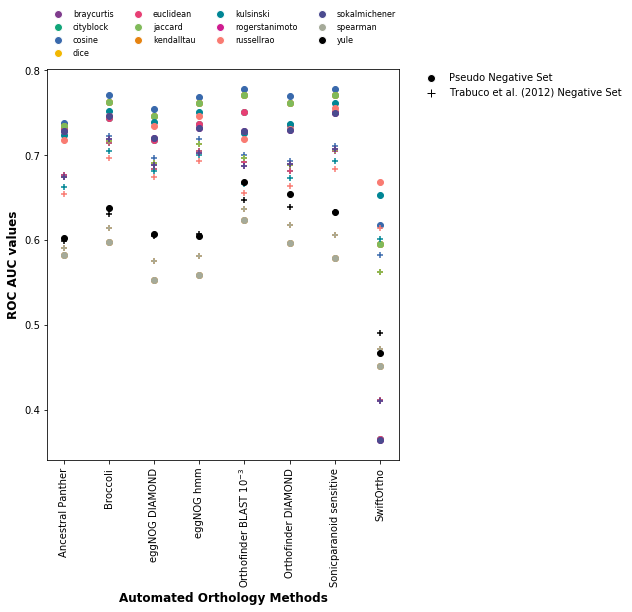

In [70]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

color_list = ['#7F3C8D','#11A579','#3969AC','#F2B701','#E73F74','#80BA5A','#E68310','#008695','#CF1C90',\
              '#f97b72','#4b4b8f','#A5AA99','#000000']
dummie = list(data_dict['Orthofinder DIAMOND'].columns.values)[1:-1]
color_dict = dict(zip(dummie, color_list))


fig = plt.figure(figsize = (0.9*7.0078778,0.9*8))

for ogdef in sorted(auc_p.keys(), key=str.lower):
    ax = fig.add_subplot(1,1,1)
    dist_list = []
    for distance in auc_p[ogdef]:
        if distance not in dist_list:
            dist_list += [distance]
        
        ax.scatter(ogdef, auc_p[ogdef][distance], c = color_dict[distance])
        ax.scatter(ogdef, auc_r[ogdef][distance], color = color_dict[distance], marker = "+")

custom_dots = []
for distance in dist_list:
    custom_dots += [Line2D([0], [0], marker='o', color="w", label=distance,\
                          markerfacecolor=color_dict[distance], markersize=8)]

custom_legend = []    
custom_legend += [Line2D([0], [0], marker='o', color='w', label="Pseudo Negative Set",\
                          markerfacecolor="black", markersize=8, linestyle = 'none')]
custom_legend += [Line2D([0], [0], marker='+', color='black', label="Trabuco et al. (2012) Negative Set",\
                          markerfacecolor="black", markersize=8, linestyle = 'none')]

distance_legend = plt.legend(handles=custom_dots, loc = 3, ncol = 4, prop={'size': 8}, mode = 'expand',\
           bbox_to_anchor = (0., 1.02, 1., .102),\
           borderaxespad=0., frameon = False)

plt.gca().add_artist(distance_legend)

ax.legend(handles = custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,\
          frameon = False)

plt.xticks(rotation = 90, size = 10)
plt.yticks(size = 10)
plt.ylabel("ROC AUC values", size=12, fontweight = "bold")
plt.xlabel("Automated Orthology Methods", size=12, fontweight = "bold") 

file_name = "./Figures/Supplementary/AUC_all_distances.pdf"
plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.05, format='pdf',\
                transparent = True)

### ARS compared to group overlap %

In [59]:
import random

random.seed(183159236135)  # Set the random seed so we get the same result upon repeat of the analysis

# For ARS we need a list containing the orthology id labels; the position corresponds to a gene id
Orthology_labels = list(Orthologies['manual'].values())
# Get the length of the set, we'll use this often
Orthology_size = len(Orthology_labels)

# Create a pandas table to keep scores
ars_baseline_df = pd.DataFrame()

# For percentages 0, 10, 20, ... ,100%; do ...
for pcnt in range(0,101,10):  
    # determine the number of elements we want to shuffle
    fraction_size = int(Orthology_size/100*pcnt)  
    scores = dict()  # Dict to keep all repeat scores
    scores["% shuffled"] = int(pcnt)
    
    for x in range(101):
        # Shuffle a part of the labels
        shuffled_indices = random.sample(range(Orthology_size),fraction_size)  # Randomly pick index positions to shuffle
        sorted_indices = sorted(shuffled_indices)  # Sort these randomly picked indices
        new_index = list(range(Orthology_size))  # An index for the entire Orthology_labels list
        # Loop over the sorted indices and replace these by the "shuffled" indices
        for i in sorted_indices:
            new_index[i] = shuffled_indices.pop()

        # Partly shuffle the original og list by using the new_index
        partly_shuffled_ogs = []  # New empty list    
        for i in new_index:
            partly_shuffled_ogs.append(Orthology_labels[i])

        # Calculate the rand score of the shuffeld versus non-shuffled og set
        rand_score = adjusted_rand_score(Orthology_labels,partly_shuffled_ogs)
        
        scores["ARS_{:02d}".format(x+1)]=rand_score

    # Store in ars_scores list
    ars_baseline_df = ars_baseline_df.append(scores, ignore_index=True)

ars_baseline_df = ars_baseline_df.set_index("% shuffled")


# Show table
ars_baseline_df

,ARS_01,ARS_02,ARS_03,ARS_04,ARS_05,ARS_06,ARS_07,ARS_08,ARS_09,ARS_10,...,ARS_90,ARS_91,ARS_92,ARS_93,ARS_94,ARS_95,ARS_96,ARS_97,ARS_98,ARS_99
% shuffled,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10.0,0.811962,0.811406,0.810916,0.814585,0.814957,0.810287,0.799035,0.819606,0.821800,0.822695,...,0.811169,0.815386,0.826634,0.813629,0.805290,0.808256,0.811382,0.813772,0.814082,0.808379
20.0,0.644066,0.642861,0.642694,0.634771,0.634485,0.645799,0.642685,0.634992,0.635944,0.641047,...,0.641235,0.644160,0.643895,0.644234,0.647433,0.638841,0.644017,0.646211,0.644704,0.631221
30.0,0.506242,0.495100,0.505927,0.492853,0.478144,0.488714,0.498177,0.490030,0.489282,0.500354,...,0.486365,0.491219,0.496886,0.504959,0.489539,0.494026,0.501899,0.494879,0.486524,0.493204
40.0,0.361153,0.347633,0.360348,0.356630,0.357574,0.378227,0.363551,0.365819,0.363368,0.361611,...,0.364532,0.374493,0.352250,0.371359,0.366493,0.358011,0.359576,0.354440,0.367613,0.369423
50.0,0.259291,0.252403,0.255099,0.254613,0.257416,0.250797,0.256893,0.246687,0.253220,0.244999,...,0.251308,0.260010,0.252460,0.256603,0.264243,0.251202,0.253277,0.257506,0.254585,0.252685
60.0,0.172592,0.161062,0.160277,0.166741,0.164568,0.166185,0.159550,0.161965,0.165421,0.166545,...,0.162999,0.162974,0.168077,0.163362,0.163775,0.164739,0.168461,0.163146,0.164911,0.177033
70.0,0.093120,0.100859,0.094697,0.095592,0.093132,0.092311,0.090268,0.095947,0.098550,0.094068,...,0.094137,0.092642,0.091000,0.091425,0.095478,0.086166,0.092936,0.091469,0.090035,0.092908
80.0,0.041546,0.045264,0.040749,0.043568,0.043368,0.043642,0.043744,0.040414,0.042347,0.041333,...,0.043294,0.043135,0.042722,0.045247,0.041566,0.040794,0.039470,0.041599,0.041599,0.043384


In [60]:
# Lets get the quantiles per row
ars_baseline_quantiles = ars_baseline_df.quantile([0,0.25,0.5,0.75,1.0],axis=1)
ars_baseline_quantiles.index.name = 'Quantiles'
ars_baseline_quantiles

% shuffled,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
Quantiles,,,,,,,,,,,
0.00,1.0,0.799035,0.626024,0.478144,0.347633,0.242168,0.152621,0.086166,0.037141,0.009497,-0.000660
0.25,1.0,0.808379,0.638841,0.490336,0.360548,0.252117,0.162092,0.091028,0.041280,0.010760,-0.000211
0.50,1.0,0.811962,0.644017,0.494839,0.363690,0.254053,0.164657,0.093002,0.042298,0.011246,-0.000002
0.75,1.0,0.815757,0.646800,0.498810,0.368728,0.257506,0.167007,0.095424,0.043266,0.012022,0.000174
1.00,1.0,0.826634,0.660042,0.511831,0.378227,0.264435,0.181115,0.100859,0.046665,0.014061,0.000852


In [366]:
%matplotlib inline
# Lets plot
import matplotlib.pyplot as plt

re_name_matrix = {'eggnog_diamond': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected': 'eggNOG hmm',\
'orthofinder_diamond_e-3': 'Orthofinder DIAMOND',\
'orthofinder_blast_e-3': 'Orthofinder BLAST',\
'panther_corrected': 'Ancestral Panther',\
'sonicparanoid_sensitive': 'SonicParanoid',\
'swiftortho': 'SwiftOrtho',\
'broccoli': 'Broccoli', "manual": "Manual"}

colors2 = ['#7F3C8D', '#11A579','#3969AC','#F2B701','#E73F74','#80BA5A', '#000000', '#808080','#c0ff33','#ff9033']

colors = {'eggNOG DIAMOND': colors2[0],\
          'eggNOG hmm':colors2[1],\
          'Orthofinder DIAMOND':colors2[2],\
          'Orthofinder BLAST':colors2[4],\
          'Ancestral Panther':colors2[5],\
          'Broccoli': colors2[3],
          'SonicParanoid': colors2[6],\
          'SwiftOrtho': colors2[7]}

broccoli Broccoli
eggnog_diamond eggNOG DIAMOND
eggnog_hmmer_corrected eggNOG hmm
orthofinder_blast_e-3 Orthofinder BLAST
orthofinder_diamond_e-3 Orthofinder DIAMOND
panther_corrected Ancestral Panther
sonicparanoid_sensitive SonicParanoid
swiftortho SwiftOrtho


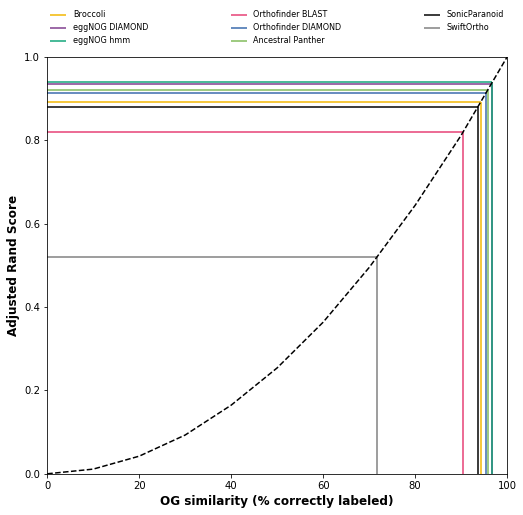

In [62]:
# Plot the randscore median
fig = plt.figure(figsize = (two_column, two_column))

pcnt = list(ars_baseline_quantiles.columns)

# Lets invert scores as it now is per pcnt difference, but it makes more sense to plot percent similar
rand_scores_q25 = list(ars_baseline_quantiles.loc[0.25])
rand_scores_q50 = list(ars_baseline_quantiles.loc[0.50])
rand_scores_q75 = list(ars_baseline_quantiles.loc[0.75])

rand_scores_q25.reverse()
rand_scores_q50.reverse()
rand_scores_q75.reverse()

plt.plot(pcnt,rand_scores_q50, color =  "black", linestyle = "--") # plot the median randscore versus % curve
# The q25 and q75 are almost on top of the q50, so no need to show them
#plt.plot(pcnt,rand_scores_q25) # plot the q25 randscore versus % curve
#plt.plot(pcnt,rand_scores_q75) # plot the q75 randscore versus % curve

def plot_lines(plt, score, x, y, label):
    # plot the scores for each orthology comparisson
    y_fit = np.interp(score, x, y)
    plt.hlines(y=score, xmin=0, xmax=y_fit, color=colors[re_name_matrix[label]], label = re_name_matrix[label])
    plt.vlines(x=y_fit, ymin=0, ymax=score, color=colors[re_name_matrix[label]])


# plot the scores for each orthology comparisson
for orthology in sorted(ars_df.index, key=str.lower):
    if orthology not in ["manual"]:
        print(orthology, re_name_matrix[orthology])
        plot_lines(plt, ars_df.loc[orthology,"Pairwise ARS LECA"], rand_scores_q50, pcnt,\
                   label = orthology)

plt.yticks(size = 10)
plt.xticks([0,20,40,60,80, 100],size = 10)
plt.legend(loc = 3, ncol = 3, prop={'size': 8}, mode = 'expand', bbox_to_anchor = (0., 1.02, 1., .102),\
           borderaxespad=0., frameon = False)
plt.tight_layout()
plt.xlabel("OG similarity (% correctly labeled)", size = 12, fontweight = 'bold')
plt.ylabel('Adjusted Rand Score', size = 12, fontweight = 'bold')
plt.xlim(0,100)
plt.ylim(0,1)
plt.savefig("./Figures/Supplementary/ARS_vs_pcnt_mislabeled_LECA_OGs.pdf",\
            bbox_inches = 'tight',pad_inches = 0.05, format='pdf',transparent = True)
plt.show()

### FGKCS as a non symmetric measure for group overlap

In [72]:
import sys
sys.path.append('./eukarya/scripts_nonsql/')
from fgrand import ComplexComparison  # Import the fgrand k-clique class from the original program directly.

from scipy.stats import hmean  # required for fgrand k clique

def make_clusters_for_fgrand(orthology):
    '''convert from {geneid:ogid} to {ogid:[geneid]} to 
    [[list of gene ids for og],[list of geneids for other og]]
    '''
    ogdict = dict()
    for gid,oid in orthology.items():
        if oid in ogdict.keys():
            ogdict[oid].add(gid)
        else:
            ogdict[oid] = {gid}
    return list(ogdict.values())

In [74]:
# NOTE: This takes a really really long time!!!
# NOTE: This is done on the LECA only OGs because the full sets take even more time.
#       (> 3 hours for one comparrisson)
import sys
sys.path.append('./eukarya/scripts_nonsql/') # Import the fgrand k-clique class from the original program directly.
from fgrand import ComplexComparison  # Import the fgrand k-clique class from the original program directly.
from scipy.stats import hmean  # required for fgrand k clique

# Now for LECA OGs only

col_row_names = sorted(Orthologies_leca_ogs.keys())
col_row_names

n_ogdefs = len(col_row_names)
ogdef_fgkc_matrix_all_ogs = np.empty((n_ogdefs,n_ogdefs))
ogdef_fgkc_matrix_all_ogs.fill(np.nan)

# Unlike ARS, FGKC is non-symmetric, so we need to calculate the whole matrix
for x in range(n_ogdefs):
    for y in range(n_ogdefs): #range(x,n_ogdefs):
        if x == y:
            ogdef_fgkc_matrix_all_ogs[x][y] = 1.0
        else:
            ogdef_x = col_row_names[x]
            ogdef_y = col_row_names[y]
            logger.info("Processing {} vs. {}".format(ogdef_x, ogdef_y))
            fgrand = ComplexComparison(gold_standard=make_clusters_for_fgrand(Orthologies_leca_ogs[ogdef_x]), 
                              clusters = make_clusters_for_fgrand(Orthologies_leca_ogs[ogdef_y]),
                              max_clique=5)
            fgrand_score = fgrand.clique_comparison_metric_grandf1score(mean_func=np.mean)
            ogdef_fgkc_matrix_all_ogs[x][y] = fgrand_score
            logger.info("{} vs. {} = {}".format(ogdef_x, ogdef_y, fgrand_score))

ogdef_fgkc_matrix_all_ogs_df = pd.DataFrame(ogdef_fgkc_matrix_all_ogs, index = col_row_names, columns=col_row_names)
ogdef_fgkc_matrix_all_ogs_df

2020-07-03 17:40:26 INFO     Processing broccoli vs. eggnog_diamond
2020-07-03 17:52:35 INFO     broccoli vs. eggnog_diamond = 0.12033068297524784
2020-07-03 17:52:35 INFO     Processing broccoli vs. eggnog_hmmer_corrected
2020-07-03 18:03:27 INFO     broccoli vs. eggnog_hmmer_corrected = 0.0913131926569114
2020-07-03 18:03:27 INFO     Processing broccoli vs. manual
2020-07-03 18:12:29 INFO     broccoli vs. manual = 0.00024990372789790026
2020-07-03 18:12:29 INFO     Processing broccoli vs. orthofinder_blast_e-3
2020-07-03 18:25:40 INFO     broccoli vs. orthofinder_blast_e-3 = 0.155338204768018
2020-07-03 18:25:40 INFO     Processing broccoli vs. orthofinder_diamond_e-3
2020-07-03 18:37:56 INFO     broccoli vs. orthofinder_diamond_e-3 = 0.12458219952173707
2020-07-03 18:37:56 INFO     Processing broccoli vs. panther_corrected
2020-07-03 18:48:43 INFO     broccoli vs. panther_corrected = 0.10583458752298897
2020-07-03 18:48:43 INFO     Processing broccoli vs. sonicparanoid_sensitive
202

2020-07-04 00:42:15 INFO     panther_corrected vs. eggnog_diamond = 0.17644198958541626
2020-07-04 00:42:15 INFO     Processing panther_corrected vs. eggnog_hmmer_corrected
2020-07-04 00:49:16 INFO     panther_corrected vs. eggnog_hmmer_corrected = 0.21749840764642403
2020-07-04 00:49:16 INFO     Processing panther_corrected vs. manual
2020-07-04 00:54:02 INFO     panther_corrected vs. manual = 0.00024990942717032606
2020-07-04 00:54:02 INFO     Processing panther_corrected vs. orthofinder_blast_e-3
2020-07-04 01:03:49 INFO     panther_corrected vs. orthofinder_blast_e-3 = 0.12870426326251103
2020-07-04 01:03:49 INFO     Processing panther_corrected vs. orthofinder_diamond_e-3
2020-07-04 01:12:23 INFO     panther_corrected vs. orthofinder_diamond_e-3 = 0.10683720166171946
2020-07-04 01:12:23 INFO     Processing panther_corrected vs. sonicparanoid_sensitive
2020-07-04 01:19:57 INFO     panther_corrected vs. sonicparanoid_sensitive = 0.15967049785290502
2020-07-04 01:19:57 INFO     Proce

,broccoli,eggnog_diamond,eggnog_hmmer_corrected,manual,orthofinder_blast_e-3,orthofinder_diamond_e-3,panther_corrected,sonicparanoid_sensitive,swiftortho
broccoli,1.000000,0.120331,0.091313,0.000250,0.155338,0.124582,0.105835,0.089613,0.012549
eggnog_diamond,0.147056,1.000000,0.237981,0.000350,0.373753,0.313012,0.216887,0.206374,0.021316
eggnog_hmmer_corrected,0.158175,0.492682,1.000000,0.000350,0.194344,0.190291,0.501555,0.265196,0.031871
manual,0.500481,0.841746,0.808762,1.000000,0.575777,0.751147,0.894289,0.538619,0.092818
orthofinder_blast_e-3,0.122282,0.218648,0.097399,0.000300,1.000000,0.349542,0.125679,0.112432,0.011316
orthofinder_diamond_e-3,0.162302,0.339838,0.143983,0.000400,0.562641,1.000000,0.139319,0.162462,0.019666
panther_corrected,0.090574,0.176442,0.217498,0.000250,0.128704,0.106837,1.000000,0.159670,0.013513
sonicparanoid_sensitive,0.141106,0.399156,0.214274,0.000400,0.257068,0.236538,0.279936,1.000000,0.024531
swiftortho,0.095578,0.134849,0.121339,0.000499,0.065241,0.086289,0.110300,0.125925,1.000000


In [75]:
ogdef_fgkc_matrix_all_ogs_df.to_csv("./Results/Tables_out/FGKC_allvsall_leca.csv", sep="\t", )

In [367]:
FGKC_matrix = pd.read_csv("./Results/Tables_out/FGKC_allvsall_leca.csv", sep="\t", index_col=0)
FGKC_matrix = FGKC_matrix.rename(columns=re_name_matrix,\
                                 index = re_name_matrix) #rename the column and row names
#reorder matrix
cols = list(FGKC_matrix.columns.values)
print(cols)
FGKC_matrix

['Broccoli', 'eggNOG DIAMOND', 'eggNOG hmm', 'Manual', 'Orthofinder BLAST', 'Orthofinder DIAMOND', 'Ancestral Panther', 'SonicParanoid', 'SwiftOrtho']


,Broccoli,eggNOG DIAMOND,eggNOG hmm,Manual,Orthofinder BLAST,Orthofinder DIAMOND,Ancestral Panther,SonicParanoid,SwiftOrtho
Broccoli,1.000000,0.120331,0.091313,0.000250,0.155338,0.124582,0.105835,0.089613,0.012549
eggNOG DIAMOND,0.147056,1.000000,0.237981,0.000350,0.373753,0.313012,0.216887,0.206374,0.021316
eggNOG hmm,0.158175,0.492682,1.000000,0.000350,0.194344,0.190291,0.501555,0.265196,0.031871
Manual,0.500481,0.841746,0.808762,1.000000,0.575777,0.751147,0.894289,0.538619,0.092818
Orthofinder BLAST,0.122282,0.218648,0.097399,0.000300,1.000000,0.349542,0.125679,0.112432,0.011316
Orthofinder DIAMOND,0.162302,0.339838,0.143983,0.000400,0.562641,1.000000,0.139319,0.162462,0.019666
Ancestral Panther,0.090574,0.176442,0.217498,0.000250,0.128704,0.106837,1.000000,0.159670,0.013513
SonicParanoid,0.141106,0.399156,0.214274,0.000400,0.257068,0.236538,0.279936,1.000000,0.024531
SwiftOrtho,0.095578,0.134849,0.121339,0.000499,0.065241,0.086289,0.110300,0.125925,1.000000


### Heatmap FGKCS

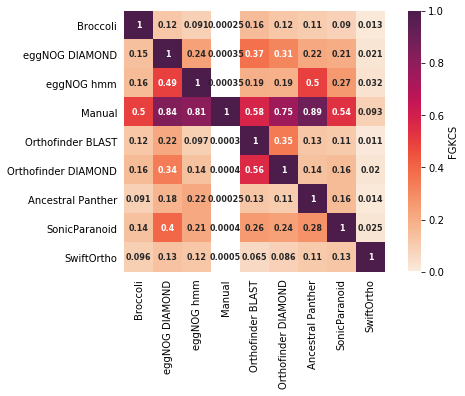

In [77]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams.update({'figure.autolayout': True})

cmap = sns.cm.rocket_r

from seaborn import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
autumn = cm.rocket_r
newcolors = autumn(np.linspace(0, 0.8, 256))#[::-1]

white = np.array([1, 1, 1, 1])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)


fig = plt.figure(figsize = (two_column,0.80*two_column))


hmap = sns.heatmap(FGKC_matrix, vmin=0, vmax=1, cmap = newcmp,\
                  annot = True, annot_kws={"size": 8, 'weight': 'bold'},\
                  cbar = True, square = True, cbar_kws={'label': 'FGKCS'})

plt.tight_layout()
plt.tick_params(left = False, bottom = False)
fig.savefig("./Figures/Supplementary/FGKC_heatmap_leca.pdf",\
           bbox_inches = 'tight',pad_inches = 0.05, format='pdf',transparent = True)

### FGKCS compared to % clutser overlap

In [358]:
import pandas as pd

fgrandkclique_leca_df = pd.DataFrame(columns=["Orthology",
                                         "Sensitivity",
                                         "PPV",
                                         "ACC",
                                         "MMR",
                                         "PWMMR",
                                         "MMR_PWMMR_hmean",
                                         "Precision measure",
                                         "Recall measure",
                                         "Precision Recall product",
                                         "Clique Precision Mean",
                                         "Recall Mean",
                                         "F-Grand K-Clique",
                                         "Clique Weighted Precision Mean",
                                         "Weighted Recall Mean",
                                         "Clique Weighted hmean (F-weighted K-Clique)"])

fgrandkclique_leca_df.set_index("Orthology")

for ogdef in Orthologies_all:
    #if ogdef in skip_list:
    #    continue
    # First get the intersect of gene ids
    logger.info("Processing {}".format(ogdef))
    ogdef_gene_ids = set(Orthologies_leca_ogs[ogdef].keys())
    

    fgrand = ComplexComparison(gold_standard=make_clusters_for_fgrand(Orthologies_leca_ogs['manual']), 
                              clusters = make_clusters_for_fgrand(Orthologies_leca_ogs[ogdef]),
                              max_clique=5)
    
    d = dict()
    d["Orthology"] = ogdef
    d["Sensitivity"] = fgrand.sensitivity()
    d["PPV"] = fgrand.ppv()
    d["ACC"] = fgrand.acc()
    d["MMR"] = fgrand.mmr()
    d["PWMMR"] = fgrand.pwmmr()
    d["MMR_PWMMR_hmean"] = fgrand.mmr_pwmmr_hmean()
    d["Precision measure"] = fgrand.precision_measure()
    d["Recall measure"] = fgrand.recall_measure()
    d["Precision Recall product"] = fgrand.precision_recall_product()
    ccmm = fgrand.clique_comparison_metric_mean()
    d["Clique Precision Mean"] = ccmm['precision_mean']
    d["Recall Mean"] = ccmm['recall_mean']
    d["F-Grand K-Clique"] = fgrand.clique_comparison_metric_grandf1score(mean_func=np.mean)
    wccmm = fgrand.clique_comparison_metric_mean(weighted=True)
    d["Clique Weighted Precision Mean"] = wccmm['precision_mean']
    d["Weighted Recall Mean"] = wccmm['recall_mean']
    d["Clique Weighted hmean (F-weighted K-Clique)"] = hmean([wccmm['precision_mean'],wccmm['recall_mean']])

    fgrandkclique_leca_df = fgrandkclique_leca_df.append(d, ignore_index=True)


fgrandkclique_leca_df = fgrandkclique_leca_df.set_index("Orthology")

fgrandkclique_leca_df.to_csv("./Results/Tables_out/fgrandkclique_leca_ogs.csv", sep="\t", )
fgrandkclique_leca_df

2020-07-06 13:38:15 INFO     Processing orthofinder_diamond_e-3
2020-07-06 13:38:57 INFO     Processing eggnog_diamond
2020-07-06 13:39:33 INFO     Processing eggnog_hmmer_corrected
2020-07-06 13:40:06 INFO     Processing orthofinder_blast_e-3
2020-07-06 13:40:48 INFO     Processing panther_corrected
2020-07-06 13:41:28 INFO     Processing manual
2020-07-06 13:41:37 INFO     Processing broccoli
2020-07-06 13:42:17 INFO     Processing swiftortho
2020-07-06 13:43:00 INFO     Processing sonicparanoid_sensitive


,Sensitivity,PPV,ACC,MMR,PWMMR,MMR_PWMMR_hmean,Precision measure,Recall measure,Precision Recall product,Clique Precision Mean,Recall Mean,F-Grand K-Clique,Clique Weighted Precision Mean,Weighted Recall Mean,Clique Weighted hmean (F-weighted K-Clique)
Orthology,,,,,,,,,,,,,,,
orthofinder_diamond_e-3,0.790255,0.953871,0.868218,0.199029,0.002413,0.004769,0.002592,0.250090,0.005131,0.725586,0.787856,0.752506,0.731285,0.788774,0.758942
eggnog_diamond,0.677290,0.979805,0.814624,0.161674,0.002408,0.004746,0.002611,0.231007,0.005164,0.958038,0.752555,0.842720,0.958082,0.750783,0.841859
eggnog_hmmer_corrected,0.659937,0.986836,0.807000,0.157850,0.002350,0.004631,0.002781,0.227124,0.005494,0.950836,0.705830,0.810095,0.951305,0.705930,0.810452
orthofinder_blast_e-3,0.832137,0.910572,0.870472,0.219172,0.002674,0.005284,0.002297,0.248542,0.004553,0.487767,0.746811,0.577321,0.495047,0.748389,0.595910
panther_corrected,0.789254,0.959896,0.870403,0.156760,0.003246,0.006360,0.002327,0.225712,0.004607,0.985704,0.822753,0.896884,0.984400,0.821515,0.895612
manual,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999899,0.999899,0.999899,0.999899,0.999899,0.999899
broccoli,0.791757,0.975653,0.878909,0.229623,0.002674,0.005286,0.002504,0.286713,0.004965,0.679841,0.408263,0.505432,0.684958,0.413782,0.515906
swiftortho,0.306191,0.997269,0.552589,0.102981,0.000808,0.001604,0.001384,0.124845,0.002737,0.995223,0.051806,0.092849,0.995160,0.058471,0.110451
sonicparanoid_sensitive,0.714500,0.975413,0.834825,0.211210,0.001901,0.003768,0.002470,0.276487,0.004897,0.715982,0.431997,0.537611,0.726493,0.441478,0.549210


In [359]:
import pandas as pd
import random 

# Create a pandas table to keep scores
fgkc_baseline_df = pd.DataFrame()

random.seed(4971481346)  # Set the random seed so we get the same result upon repeat of the analysis

man_clusters = make_clusters_for_fgrand(Orthologies['manual'])

(man_gene_ids,man_og_ids) = zip(*Orthologies['manual'].items())

# Get the length of the set, we'll use this often
Orthology_size = len(man_og_ids)

# For percentages 0, 10, 20, ... ,100%; do ...
for pcnt in range(0,101,10):  
    # determine the number of elements we want to shuffle
    fraction_size = int(Orthology_size/100*pcnt)  
    scores = dict()  # Dict to keep all repeat scores
    scores["% shuffled"] = int(pcnt)
    
    for x in range(11):
        # Shuffle a part of the labels
        shuffled_indices = random.sample(range(Orthology_size),fraction_size)  # Randomly pick index positions to shuffle
        sorted_indices = sorted(shuffled_indices)  # Sort these randomly picked indices
        new_index = list(range(Orthology_size))  # An index for the entire Orthology_labels list
        # Loop over the sorted indices and replace these by the "shuffled" indices
        for i in sorted_indices:
            new_index[i] = shuffled_indices.pop()

        # Partly shuffle the original og list by using the new_index
        partly_shuffled_ogs = []  # New empty list    
        for i in new_index:
            partly_shuffled_ogs.append(man_og_ids[i])
            
        # Turn the shuffled og-ids back into a dict as before {geneid: ogid}
        partly_shuffled_ogs_dict = dict(zip(man_gene_ids,partly_shuffled_ogs))

        # Calculate the rand score of the shuffeld versus non-shuffled og set
        fgrand = ComplexComparison(gold_standard=man_clusters, 
                              clusters = make_clusters_for_fgrand(partly_shuffled_ogs_dict),
                              max_clique=5)
        
        scores["FGKC_{:02d}".format(x+1)]=fgrand.clique_comparison_metric_grandf1score(mean_func=np.mean)

    # Store in ars_scores list
    fgkc_baseline_df = fgkc_baseline_df.append(scores, ignore_index=True)

fgkc_baseline_df = fgkc_baseline_df.set_index("% shuffled")

# Show table
fgkc_baseline_df

,FGKC_01,FGKC_02,FGKC_03,FGKC_04,FGKC_05,FGKC_06,FGKC_07,FGKC_08,FGKC_09,FGKC_10,FGKC_11
% shuffled,,,,,,,,,,,
0.0,0.999899,0.999899,0.999899,0.999899,0.999900,0.999900,0.999900,0.999900,0.999900,0.999899,0.999900
10.0,0.704528,0.714579,0.737603,0.692358,0.694989,0.726125,0.709507,0.682855,0.698803,0.714481,0.727442
20.0,0.495721,0.502105,0.471278,0.482968,0.495802,0.467467,0.460466,0.485731,0.482264,0.457875,0.463583
30.0,0.307872,0.329156,0.297431,0.320724,0.343494,0.331439,0.304985,0.345255,0.340652,0.307378,0.320786
40.0,0.209640,0.224445,0.193187,0.204165,0.193082,0.208564,0.222412,0.217838,0.213060,0.229331,0.211312
50.0,0.138223,0.142273,0.132376,0.122240,0.118958,0.125626,0.137888,0.139120,0.118639,0.124448,0.118372
60.0,0.083905,0.071609,0.074914,0.070599,0.075595,0.067543,0.078323,0.065669,0.067794,0.072587,0.075640
70.0,0.037276,0.039020,0.041859,0.037148,0.037635,0.039681,0.033465,0.038231,0.033837,0.034995,0.036400
80.0,0.016859,0.017292,0.018639,0.016473,0.016563,0.017132,0.018186,0.017039,0.018995,0.016755,0.017846


In [360]:
# Lets get the quantiles per row
fgkc_baseline_quantiles = fgkc_baseline_df.quantile([0,0.25,0.5,0.75,1.0],axis=1)
fgkc_baseline_quantiles.index.name = 'Quantiles'
fgkc_baseline_quantiles

% shuffled,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
Quantiles,,,,,,,,,,,
0.00,0.999899,0.682855,0.457875,0.297431,0.193082,0.118372,0.065669,0.033465,0.016473,0.006706,0.003364
0.25,0.999899,0.696896,0.465525,0.307625,0.206364,0.120599,0.069196,0.035697,0.016807,0.006890,0.003541
0.50,0.999900,0.709507,0.482264,0.320786,0.211312,0.125626,0.072587,0.037276,0.017132,0.007086,0.003589
0.75,0.999900,0.720352,0.490726,0.336046,0.220125,0.138055,0.075618,0.038626,0.018016,0.007154,0.003702
1.00,0.999900,0.737603,0.502105,0.345255,0.229331,0.142273,0.083905,0.041859,0.018995,0.007318,0.004108


Index(['orthofinder_diamond_e-3', 'eggnog_diamond', 'eggnog_hmmer_corrected',
       'orthofinder_blast_e-3', 'panther_corrected', 'manual', 'broccoli',
       'swiftortho', 'sonicparanoid_sensitive'],
      dtype='object', name='Orthology')
orthofinder_diamond_e-3
eggnog_diamond
eggnog_hmmer_corrected
orthofinder_blast_e-3
panther_corrected
manual
broccoli
swiftortho
sonicparanoid_sensitive


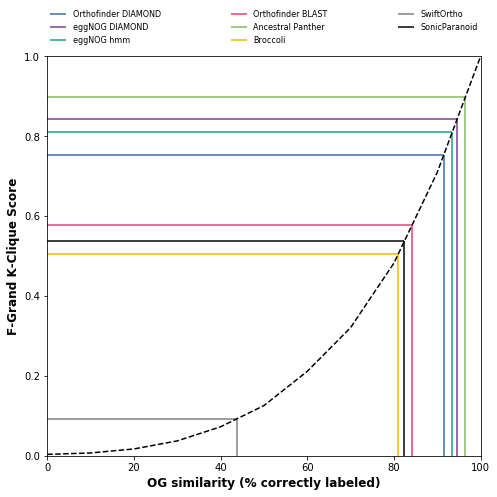

In [368]:
# Plot the randscore median
fig = plt.figure(figsize = (two_column, two_column))
# Plot the fgkc median
pcnt = list(fgkc_baseline_quantiles.columns)

# Lets invert scores as it now is per pcnt difference, but it makes more sense to plot percent similar
fgkc_scores_q25 = list(fgkc_baseline_quantiles.loc[0.25])
fgkc_scores_q50 = list(fgkc_baseline_quantiles.loc[0.50])
fgkc_scores_q75 = list(fgkc_baseline_quantiles.loc[0.75])

fgkc_scores_q25.reverse()
fgkc_scores_q50.reverse()
fgkc_scores_q75.reverse()

plt.plot(pcnt,fgkc_scores_q50, color = "black", linestyle = "--") # plot the median fgkc versus % curve
# The q25 and q75 are almost on top of the q50, so no need to show them
def plot_lines(plt, score, x, y, label):
    # plot the scores for each orthology comparisson
    y_fit = np.interp(score, x, y)
    plt.hlines(y=score, xmin=0, xmax=y_fit, color=colors[re_name_matrix[label]], label = re_name_matrix[label])
    plt.vlines(x=y_fit, ymin=0, ymax=score, color=colors[re_name_matrix[label]])

print(fgrandkclique_leca_df.index)
# plot the scores for each orthology comparisson
for orthology in fgrandkclique_leca_df.index:
    print(orthology)
    if orthology != "manual":
        plot_lines(plt, fgrandkclique_leca_df.loc[orthology,"F-Grand K-Clique"], fgkc_scores_q50, pcnt, label = orthology)
        #plot_lines(plt, fgrandkclique_df.loc[orthology,"F-Grand K-Clique"], f, label = orthology)

plt.yticks(size = 10)
plt.xticks([0,20,40,60,80, 100],size = 10)
plt.legend(loc = 3, ncol = 3, prop={'size': 8}, mode = 'expand', bbox_to_anchor = (0., 1.02, 1., .102),\
           borderaxespad=0., frameon = False)
plt.tight_layout()
plt.xlabel("OG similarity (% correctly labeled)", size = 12, fontweight = 'bold')
plt.ylabel('F-Grand K-Clique Score', size = 12, fontweight = 'bold')
plt.xlim(0,100)
plt.ylim(0,1)
plt.savefig("./Figures/Supplementary/F-Grand_K-Clique_vs_pcnt_mislabeled_LECA_OGs.pdf")
plt.show()